# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [66]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [67]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [68]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [602]:
df_train.shape

(15223, 53)

In [70]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [71]:
df_test.shape

(14910, 52)

In [72]:
df_train.head().T

,0,1,2,3,4
AGREEMENT_RK,59910150,59910230,59910525,59910803,59911781
TARGET,0,0,0,0,0
AGE,49,32,52,39,30
SOCSTATUS_WORK_FL,1,1,1,1,1
SOCSTATUS_PENS_FL,0,0,0,0,0
GENDER,1,1,1,1,0
CHILD_TOTAL,2,3,4,1,0
DEPENDANTS,1,3,0,1,0
EDUCATION,Среднее специальное,Среднее,Неполное среднее,Высшее,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке,Состою в браке,Состою в браке,Состою в браке


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [73]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [74]:
df = df_test.append(df_train).reset_index(drop=True)

In [75]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [77]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неполное среднее', 'Неоконченное высшее', 'Среднее', 'Два и более высших образования', 'Ученая степень', 'Высшее'}


MARITAL_STATUS
{'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Не состоял в браке', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Страхование', 'Информационные технологии', 'Образование', 'Развлечения/Искусство', 'Сборочные производства', 'Государственная служба', 'Логистика', 'Маркетинг', 'Нефтегазовая промышленность', 'Коммунальное хоз-во/Дорожные службы', 'Управляющая компания', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Банк/Финансы', 'Наука', 'Строительство', 'Салоны красоты и здоровья', 'ЧОП/Детективная д-ть', 'Туризм', 'Недвижимость', 'Другие сферы', 'Энергетика', 'Информационные услуги', 'Юридические услуги/нотариальные услуги', 'СМИ/Реклама/PR-агенства', 'Торговля', 'Здравоохранение', 'Подбор персонала', 'Транспорт', 'Металлургия/Промышленность/Машиностроение', 'Сельское хозяйство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [26]:
df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')

0          335.20
1         2000.00
2         2490.00
3          575.00
4        10000.00
5        10239.00
6         1000.00
7         5000.00
8          659.00
9          767.00
10        1200.00
11        2000.00
12        1000.00
13        8000.00
14         500.00
15        3000.00
16        5030.00
17         500.00
18        1520.00
19         334.00
20         500.00
21         753.23
22       17000.00
23        1287.00
24        6000.00
25        1000.00
26        1200.00
27        1000.00
28        4500.00
29        2900.00
           ...   
30103     2100.00
30104     7000.00
30105     5000.00
30106        0.00
30107        0.00
30108     5000.00
30109     1900.00
30110      650.00
30111     8000.00
30112     2926.40
30113        0.00
30114     1000.00
30115     6000.00
30116      600.00
30117     1500.00
30118      500.00
30119     1500.00
30120     1200.00
30121    17500.00
30122     1257.00
30123     3150.00
30124      880.00
30125     2050.00
30126     2000.00
30127     

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [603]:
#Пропуски есть. Пропуски в work_time я заменю на среднее значение work_time. Пропуски 

In [637]:
df[(df["TARGET"]==1) & (df["sample"]=="train")].shape

(1812, 53)

In [638]:
df[(df["TARGET"]==1) & (df["sample"]=="test")].shape

(1750, 53)

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [760]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    df_output=df_output.drop(["AGREEMENT_RK","REG_ADDRESS_PROVINCE","POSTAL_ADDRESS_PROVINCE","TP_PROVINCE"], axis=1)#
    
    #df_output[df_output['Embarked'].isin(['Q', 'C'])
    for i in df_output[['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']]:
        df_output[i]=df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
        
    df_output["WORK_TIME"]= df_output["WORK_TIME"].fillna((df_output["WORK_TIME"].mean()))
    df_output = df_output[~df_output['ORG_TP_FCAPITAL'].isnull()]
    df_output = df_output[~df_output['GEN_INDUSTRY'].isnull()]
    df_output["PREVIOUS_CARD_NUM_UTILIZED"]= df_output["PREVIOUS_CARD_NUM_UTILIZED"].fillna(0)
    #df_output=df_output.drop(["REG_ADDRESS_PROVINCE","POSTAL_ADDRESS_PROVINCE","TP_PROVINCE"], axis=1)
    df_output= pd.get_dummies(df_output)
    
    
    df_output.shape
    return df_output


In [761]:
ggg=preproc_data(df)
ggg.shape

(30133, 21991)

In [762]:
ggg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 21991 entries, AGREEMENT_RK to sample_train
dtypes: float64(2), int64(32), uint8(21957)
memory usage: 638.8 MB


In [714]:
df[(df["TARGET"] == 1) & (df["sample"]=="train")].shape #target- целевой показатель

(1812, 53)

In [715]:
ggg[(ggg["TARGET"] == 1) & (ggg["sample_train"]==1)].shape #показатели которые остались после подготовительной функции

(1762, 211)

In [716]:
test=ggg[(ggg["sample_test"]==1)]
target= test["TARGET"]
testdf=test.drop(["sample_train", "sample_test","TARGET"], axis=1) 
testdf.shape #тестовая выборка

(13564, 208)

In [717]:
y =ggg[ggg["sample_train"]==1]
#ggg_train = ggg_train.drop(["sample_train", "sample_test","TARGET"], axis=1)
y=ggg[(ggg["TARGET"] == 1) & (ggg["sample_test"]==1)]
y=y["TARGET"]
y.shape

(1716,)

In [718]:
newggg=ggg.drop(["sample_train", "sample_test","TARGET"], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [731]:
y =ggg['TARGET'] #целевая переменная
sum(y)
#y_test=ggg_train['TARGET']

3478

In [732]:
newggg.shape

(27419, 208)

In [733]:
y.shape

(27419,)

In [734]:
import sklearn
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(newggg, y, test_size=0.3, random_state=42)

In [735]:
y_test.shape

(8226,)

In [736]:
X_test.shape

(8226, 208)

#### Задание 5. Обучение и оценка качества разных моделей

In [737]:
from sklearn.linear_model import LogisticRegression  # импортируем модель машинного обучения
  

In [738]:
X_test.shape

(8226, 208)

In [739]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()                         # инициализируем модель
model.fit(X_train, y_train)                                     # обучаем модель
predict = model.predict(X_test)  
## Your Code Here
predict_proba = model.predict_proba(X_test)[:,1]

c:\users\ox\appdata\local\programs\python\python35\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [740]:
model = RandomForestClassifier()                         # инициализируем модель
model.fit(X_train, y_train)                                     # обучаем модель
predict3 = model.predict(X_test) 
predict_proba3 = model.predict_proba(X_test)[:,1]
predict3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [741]:
model = DecisionTreeClassifier()                         # инициализируем модель
model.fit(X_train, y_train)                                     # обучаем модель
predict4 = model.predict(X_test)
predict_proba4 = model.predict_proba(X_test)[:,1]
predict4

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [742]:
model = LogisticRegression()                         # инициализируем модель
model.fit(ggg, y)                                     # обучаем модель
predict2 = model.predict(ggg) 

In [744]:
sum(abs(y- predict2))

3477

In [745]:
sum(abs(y_test-predict))

1023

In [746]:
sorted(predict_proba)

[0.0,
 1.892374323502709e-307,
 0.00010507081324396866,
 0.0008050317570906532,
 0.0008365337606435822,
 0.0019115824001421518,
 0.002044427157505484,
 0.0027105105757253083,
 0.0027568113689630538,
 0.003421263653916898,
 0.003525505743184012,
 0.0046123693312893396,
 0.00491947707646405,
 0.005471132014624493,
 0.005899780496875695,
 0.006519611490104492,
 0.006546475796065034,
 0.0073050509654347,
 0.007321190004417434,
 0.00764977810525362,
 0.007703454983765604,
 0.008010017315902618,
 0.008464735725452005,
 0.009009011876761465,
 0.009211070575937043,
 0.009221215760392476,
 0.009328573863519847,
 0.009397826449617964,
 0.00960793238704317,
 0.009784061484134758,
 0.00988210993256998,
 0.01034877182062557,
 0.010682158714767983,
 0.010974782048679643,
 0.011790265619840602,
 0.012212073595605628,
 0.012323935075652307,
 0.012490098495129937,
 0.012822493975916924,
 0.012874962083535583,
 0.01301410826812063,
 0.013140444910956388,
 0.013977883703446568,
 0.013985384688779018,
 0.

In [747]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Logisticregression
precisionLR=precision_score(y_test, predict)
recallLR=recall_score(y_test, predict)
accuracyLR=accuracy_score(y_test, predict)
print('precision', precisionLR)
print('recall', recallLR)
print('accuracy', accuracyLR)

precision 0.0
recall 0.0
accuracy 0.87563822027717


In [748]:
#full dataframe without splitting
precisionFullDF=precision_score(y, predict2)
recallFullDF=recall_score(y, predict2)
accuracyFullDF=accuracy_score(y, predict2)
print('precision', precisionFullDF)
print('recall', recallFullDF)
print('accuracy', accuracyFullDF)

precision 0.5384615384615384
recall 0.0020126509488211618
accuracy 0.8731901236368941


In [749]:
#RandomForestClassifier()
precisionRFC=precision_score(y_test, predict3)
recallRFC=recall_score(y_test, predict3)
accuracyRFC=accuracy_score(y_test, predict3)
print('precision', precisionRFC)
print('recall', recallRFC)
print('accuracy', accuracyRFC)


precision 0.23076923076923078
recall 0.008832188420019628
accuracy 0.8735716022368101


In [750]:
#DecisionTreeClassifier() 
precisionDTC=precision_score(y_test, predict4)
recallDTC=recall_score(y_test, predict4)
accuracyDTC=accuracy_score(y_test, predict4)
print('precision', precisionDTC)
print('recall', recallDTC)
print('accuracy', accuracyDTC)

precision 0.16269165247018738
recall 0.1874386653581943
accuracy 0.7798443958181376


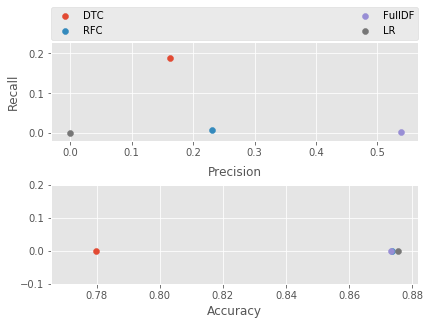

In [751]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt


plt.subplot(2, 1, 1)
DTC=plt.scatter(precisionDTC,recallDTC, label="DTC")

RFC=plt.scatter(precisionRFC,recallRFC, label="RFC")

FullDF=plt.scatter(precisionFullDF,recallFullDF, label="FullDF")

LR= plt.scatter(precisionLR,recallLR, label="LR")

plt.ylabel('Recall',labelpad=8)
plt.xlabel('Precision',labelpad=8)
# Create a legend for the first line.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(2, 1, 2)
plt.scatter(accuracyDTC,0, label="DTC")
plt.scatter(accuracyRFC,0, label= "RFC")

plt.scatter(accuracyFullDF,0, label= "FullDF")
plt.scatter(accuracyLR,0, label= "LR")

plt.ylim((-0.1, 0.2))
plt.xlabel('Accuracy')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)

#plt.legend(handles=[DTC, RFC,FullDF,LR])

#plt.subplot(precision_score(y_test, predict))
#plt.subplot(precision_score(y_test, predict3))
#plt.subplot(precision_score(y_test, predict4))
#plt.subplot(accuracy_score(y_test, predict))

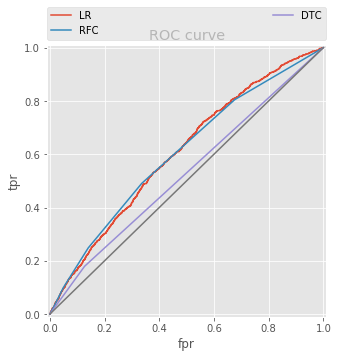

In [703]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict_proba)
fpr3, tpr3, thresholds = roc_curve(y_test, predict_proba3)
fpr4, tpr4, thresholds = roc_curve(y_test, predict_proba4)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label="LR")
plt.plot(fpr3, tpr3, label="RFC")
plt.plot(fpr4, tpr4, label="DTC")
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

In [752]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    newggg,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.5916284633290989

In [753]:
dtc = DecisionTreeClassifier() 
cross_val_score(
    dtc,
    newggg,
    y,
    scoring='roc_auc',
    cv=10
).mean()


0.527853460547577

In [754]:
lr = LogisticRegression()
cross_val_score(
    lr,
    newggg,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.6024807784622543

In [755]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(testdf, target, test_size=0.3, random_state=42)
model = LogisticRegression()                       # инициализируем модель
model.fit(X_train, y_train)                                     # обучаем модель
predicttest = model.predict(X_test)
predict_proba_test = model.predict_proba(X_test)[:,1]
sorted(predict_proba_test)

[0.0003791536410207417,
 0.0007693248103951083,
 0.0010421858246694737,
 0.0011856445879000444,
 0.0012851271261993386,
 0.0014048783676825197,
 0.0014105438225621649,
 0.0017475478801594888,
 0.002877446499195199,
 0.0032457333423872173,
 0.003393303128009235,
 0.0036304137272835835,
 0.0046563936485123835,
 0.005401179681008323,
 0.005487793480814274,
 0.0056557517160030855,
 0.005920979340940825,
 0.006445868324478659,
 0.006853133071056953,
 0.007953646078188752,
 0.008330931684104368,
 0.008478503943732,
 0.009926146665886707,
 0.009941740060734009,
 0.011193504634115682,
 0.011904061331607955,
 0.011946852068686052,
 0.012657136014535905,
 0.012678757506169062,
 0.01317644665633752,
 0.01326529293152403,
 0.013703794527760738,
 0.013778465703142978,
 0.014337090994812575,
 0.014365678788446582,
 0.01439512311652239,
 0.014661130495641049,
 0.014934072672526024,
 0.015110628222933874,
 0.015304462481306276,
 0.015634199188781377,
 0.01619492426482278,
 0.016243367625963262,
 0.016

ROC AUC score is 0.5988608794343964


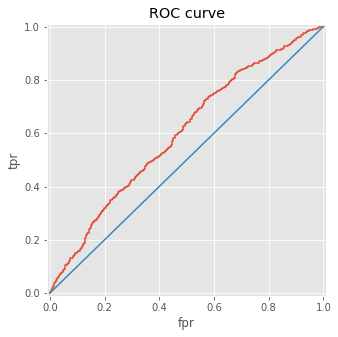

In [756]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
fpr5, tpr5, thresholds = roc_curve(y_test, predict_proba_test)
rauc= roc_auc_score(y_test, predict_proba_test)
plt.figure(figsize=(5, 5))
plt.plot(fpr5, tpr5, label="LR")

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print ("ROC AUC score is "+ str(rauc))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)